<a href="https://colab.research.google.com/github/hivewire/midterm-deep-learning/blob/main/midterm_transaction_data_Fuji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q gdown

# kalian download semua file dari gdrive dibawah lalu buat folder (ex. midterm_folder)
!gdown --folder 1JvI5xhPfN3VmjpWYZk9fCHG41xG697um -O midterm_folder

Retrieving folder contents
Processing file 1ALveidCmKzk4p_liQ7b663BXL0PcTaFN test_transaction.csv
Processing file 1Ujh37a1kTarNf3dSOSrj-hKDswULebYA train_transaction.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN

but Gdown can't. Please check connections and permissions.


In [ ]:
import pandas as pd
import polars as pl

BASE_PATH = "midterm_folder"

train_transaction = pl.read_csv(f"{BASE_PATH}/train_transaction.csv")
test_transaction  = pl.read_csv(f"{BASE_PATH}/test_transaction.csv")

print(train_transaction.shape) #590540 row dan 393 feature + 1 target
print(test_transaction.shape) #506691 row dan 393 feature

(33555, 394)
(31102, 393)


In [ ]:
train_transaction.head() #isFraud adalah target featurenya

TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2987000,0,86400,68.5,"""W""",13926,null,150.0,"""discover""",142.0,"""credit""",315.0,87.0,19.0,null,null,null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,null,13.0,null,null,null,…,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987001,0,86401,29.0,"""W""",2755,404.0,150.0,"""mastercard""",102.0,"""credit""",325.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987002,0,86469,59.0,"""W""",4663,490.0,150.0,"""visa""",166.0,"""debit""",330.0,87.0,287.0,null,"""outlook.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987003,0,86499,50.0,"""W""",18132,567.0,150.0,"""mastercard""",117.0,"""debit""",476.0,87.0,null,null,"""yahoo.com""",null,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,null,…,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987004,0,86506,50.0,"""H""",4497,514.0,150.0,"""mastercard""",102.0,"""credit""",420.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,null,null,null,null,null,…,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_transaction.head() #uji data baru, setelah pembuatan model machine learningnya

TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
3663549,18403224,31.95,"""W""",10409,111.0,150.0,"""visa""",226.0,"""debit""",170.0,87.0,1.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,null,null,…,0.0,0.0,1.0,0.0,47.950001,0.0,0.0,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663550,18403263,49.0,"""W""",4272,111.0,150.0,"""visa""",226.0,"""debit""",299.0,87.0,4.0,null,"""aol.com""",null,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,null,null,…,0.0,0.0,1.0,0.0,280.0,77.0,0.0,280.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663551,18403310,171.0,"""W""",4476,574.0,150.0,"""visa""",226.0,"""debit""",472.0,87.0,2635.0,null,"""hotmail.com""",null,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,null,null,…,0.0,0.0,1.0,0.0,1321.0,0.0,0.0,1058.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663552,18403310,284.95,"""W""",10989,360.0,150.0,"""visa""",166.0,"""debit""",205.0,87.0,17.0,null,"""gmail.com""",null,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663553,18403317,67.95,"""W""",18018,452.0,150.0,"""mastercard""",117.0,"""debit""",264.0,87.0,6.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,null,null,…,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


# Task
Visualize the distribution of the `isFraud` column in the `train_transaction` DataFrame using a bar chart, showing the counts or percentages of fraudulent and non-fraudulent transactions.

## Visualize Target Variable Distribution

### Subtask:
Create a bar chart to visualize the distribution of the `isFraud` column in `train_transaction`. The chart should clearly show the counts or percentages of fraudulent and non-fraudulent transactions, with appropriate labels and a legend, to highlight the class imbalance.


**Reasoning**:
To visualize the distribution of the 'isFraud' column, I need to first calculate the counts of each category, then use `matplotlib.pyplot` to create a bar chart, and finally display it.



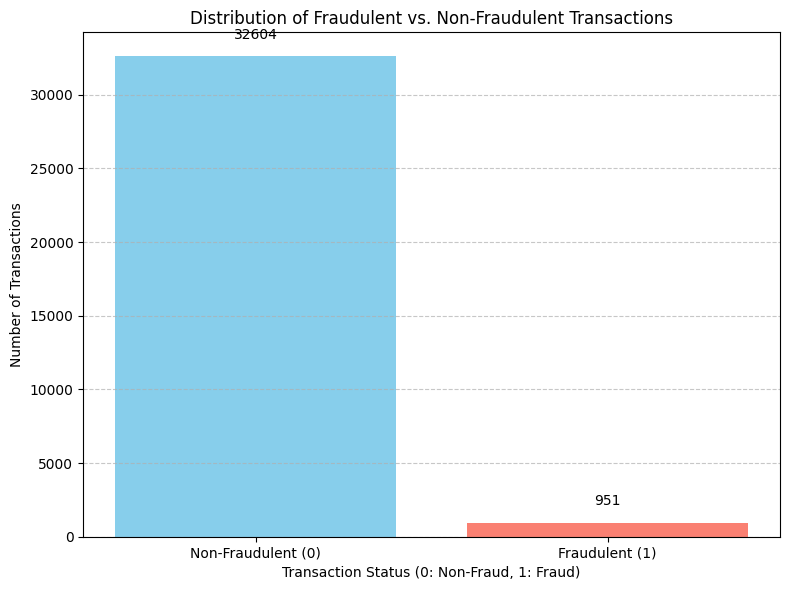

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts of the isFraud column
frequencies = train_transaction["isFraud"].value_counts().sort("isFraud")

# Convert to pandas DataFrame for easier plotting with matplotlib
frequencies_pd = frequencies.to_pandas()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(x=frequencies_pd["isFraud"].astype(str), height=frequencies_pd["count"], color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Transaction Status (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])

# Add count annotations on top of bars
for index, value in enumerate(frequencies_pd["count"]):
    plt.text(index, value + 1000, str(value), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Handle Missing Values

### Subtask:
Implement a strategy to handle missing values, such as imputation for numerical columns (e.g., mean, median) and categorical columns (e.g., mode), or dropping columns/rows with an excessive number of missing values.


**Reasoning**:
I need to calculate the percentage of missing values for each column in both the `train_transaction` and `test_transaction` DataFrames. I will define a function to perform this calculation and then apply it to both DataFrames.



In [ ]:
def calculate_missing_percentages(df, df_name):
    missing_counts = df.null_count()
    total_rows = df.height
    missing_percentages = pl.DataFrame({
        "column_name": missing_counts.columns,
        "null_count": [missing_counts[col].item() for col in missing_counts.columns],
        "percentage": [(missing_counts[col].item() / total_rows) * 100 for col in missing_counts.columns]
    })
    missing_percentages = missing_percentages.sort(by="percentage", descending=True)
    print(f"Missing value percentages for {df_name} DataFrame:\n{missing_percentages.head(10)}")
    return missing_percentages

missing_train = calculate_missing_percentages(train_transaction, "train_transaction")
missing_test = calculate_missing_percentages(test_transaction, "test_transaction")

Missing value percentages for train_transaction DataFrame:
shape: (10, 3)
┌─────────────┬────────────┬────────────┐
│ column_name ┆ null_count ┆ percentage │
│ ---         ┆ ---        ┆ ---        │
│ str         ┆ i64        ┆ f64        │
╞═════════════╪════════════╪════════════╡
│ D7          ┆ 32118      ┆ 95.717479  │
│ D13         ┆ 31435      ┆ 93.682015  │
│ dist2       ┆ 31351      ┆ 93.431679  │
│ D12         ┆ 31131      ┆ 92.776039  │
│ D14         ┆ 30901      ┆ 92.090598  │
│ D6          ┆ 30690      ┆ 91.461779  │
│ D8          ┆ 28324      ┆ 84.410669  │
│ D9          ┆ 28324      ┆ 84.410669  │
│ M7          ┆ 26971      ┆ 80.378483  │
│ M8          ┆ 26971      ┆ 80.378483  │
└─────────────┴────────────┴────────────┘
Missing value percentages for test_transaction DataFrame:
shape: (10, 3)
┌─────────────┬────────────┬────────────┐
│ column_name ┆ null_count ┆ percentage │
│ ---         ┆ ---        ┆ ---        │
│ str         ┆ i64        ┆ f64        │
╞════════════

**Reasoning**:
Based on the calculated missing value percentages, I will identify columns with more than 70% missing values in both `train_transaction` and `test_transaction` DataFrames and drop them. This will reduce noise and improve model performance by removing features with insufficient data.



In [ ]:
missing_threshold = 70.0

# Identify columns to drop from train_transaction
columns_to_drop_train = missing_train.filter(pl.col("percentage") > missing_threshold)["column_name"].to_list()
print(f"Columns to drop from train_transaction (>{missing_threshold}% missing): {len(columns_to_drop_train)} columns\n{columns_to_drop_train[:10]}\n")

# Identify columns to drop from test_transaction
columns_to_drop_test = missing_test.filter(pl.col("percentage") > missing_threshold)["column_name"].to_list()
print(f"Columns to drop from test_transaction (>{missing_threshold}% missing): {len(columns_to_drop_test)} columns\n{columns_to_drop_test[:10]}\n")

# Drop columns from both DataFrames
train_transaction = train_transaction.drop(columns_to_drop_train)
test_transaction = test_transaction.drop(columns_to_drop_test)

print(f"Shape of train_transaction after dropping columns: {train_transaction.shape}")
print(f"Shape of test_transaction after dropping columns: {test_transaction.shape}")

Columns to drop from train_transaction (>70.0% missing): 183 columns
['D7', 'D13', 'dist2', 'D12', 'D14', 'D6', 'D8', 'D9', 'M7', 'M8']

Columns to drop from test_transaction (>70.0% missing): 168 columns
['dist2', 'D7', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V146', 'V147']

Shape of train_transaction after dropping columns: (33555, 211)
Shape of test_transaction after dropping columns: (31102, 225)


**Reasoning**:
Now that columns with excessive missing values have been dropped, I will identify numerical columns with remaining missing values and impute them with the median. Transaction amounts often have skewed distributions, making the median a more robust imputation strategy than the mean, as it is less sensitive to outliers.



In [ ]:
numerical_cols_with_missing_train = []
numerical_cols_with_missing_test = []

for col in train_transaction.columns:
    if train_transaction[col].dtype.is_numeric() and train_transaction[col].null_count() > 0:
        numerical_cols_with_missing_train.append(col)

for col in test_transaction.columns:
    if test_transaction[col].dtype.is_numeric() and test_transaction[col].null_count() > 0:
        numerical_cols_with_missing_test.append(col)

print(f"Numerical columns with missing values in train_transaction: {len(numerical_cols_with_missing_train)} columns\n{numerical_cols_with_missing_train[:10]}\n")
print(f"Numerical columns with missing values in test_transaction: {len(numerical_cols_with_missing_test)} columns\n{numerical_cols_with_missing_test[:10]}\n")

# Impute numerical columns with their median
for col in numerical_cols_with_missing_train:
    median_value = train_transaction[col].median()
    train_transaction = train_transaction.with_columns(pl.col(col).fill_null(median_value))

for col in numerical_cols_with_missing_test:
    # Using median from train_transaction for consistency, if available, otherwise test's median
    if col in numerical_cols_with_missing_train:
        median_value = train_transaction[col].median() # Use median from training data
    else:
        median_value = test_transaction[col].median()
    test_transaction = test_transaction.with_columns(pl.col(col).fill_null(median_value))

print(f"Missing numerical values in train_transaction after imputation: {train_transaction.select(pl.all().is_null().sum()).transpose()}")
print(f"Missing numerical values in test_transaction after imputation: {test_transaction.select(pl.all().is_null().sum()).transpose()}")

Numerical columns with missing values in train_transaction: 138 columns
['card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'D2', 'D3', 'D4', 'D5']

Numerical columns with missing values in test_transaction: 151 columns
['card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'D1', 'D2', 'D3', 'D4']

Missing numerical values in train_transaction after imputation: shape: (211, 1)
┌──────────┐
│ column_0 │
│ ---      │
│ u32      │
╞══════════╡
│ 0        │
│ 0        │
│ 0        │
│ 0        │
│ 0        │
│ …        │
│ 0        │
│ 0        │
│ 0        │
│ 0        │
│ 0        │
└──────────┘
Missing numerical values in test_transaction after imputation: shape: (225, 1)
┌──────────┐
│ column_0 │
│ ---      │
│ u32      │
╞══════════╡
│ 0        │
│ 0        │
│ 0        │
│ 0        │
│ 0        │
│ …        │
│ 0        │
│ 0        │
│ 0        │
│ 0        │
│ 0        │
└──────────┘


**Reasoning**:
Now that numerical columns have been imputed, I will identify categorical columns with remaining missing values and impute them with the mode. Using the mode is a common strategy for categorical data as it replaces missing values with the most frequent category, preserving the distribution's central tendency.



In [ ]:
categorical_cols_with_missing_train = []
categorical_cols_with_missing_test = []

for col in train_transaction.columns:
    if not train_transaction[col].dtype.is_numeric() and train_transaction[col].null_count() > 0:
        categorical_cols_with_missing_train.append(col)

for col in test_transaction.columns:
    if not test_transaction[col].dtype.is_numeric() and test_transaction[col].null_count() > 0:
        categorical_cols_with_missing_test.append(col)

print(f"Categorical columns with missing values in train_transaction: {len(categorical_cols_with_missing_train)} columns\n{categorical_cols_with_missing_train[:10]}\n")
print(f"Categorical columns with missing values in test_transaction: {len(categorical_cols_with_missing_test)} columns\n{categorical_cols_with_missing_test[:10]}\n")

# Impute categorical columns with their mode
for col in categorical_cols_with_missing_train:
    # Get the mode. If multiple modes, pick the first one.
    mode_value = train_transaction[col].mode().item()
    train_transaction = train_transaction.with_columns(pl.col(col).fill_null(mode_value))

for col in categorical_cols_with_missing_test:
    # Use mode from train_transaction for consistency, if available, otherwise test's mode
    if col in categorical_cols_with_missing_train:
        mode_value = train_transaction[col].mode().item()
    else:
        mode_value = test_transaction[col].mode().item()
    test_transaction = test_transaction.with_columns(pl.col(col).fill_null(mode_value))

print(f"Total missing values in train_transaction after all imputations:\n{train_transaction.select(pl.all().is_null().sum())}")
print(f"Total missing values in test_transaction after all imputations:\n{test_transaction.select(pl.all().is_null().sum())}")


Categorical columns with missing values in train_transaction: 9 columns
['card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6']

Categorical columns with missing values in test_transaction: 12 columns
['card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7']



ValueError: must specify either a fill `value` or `strategy`

**Reasoning**:
The previous code failed because `pl.Series.mode().item()` can return `None` if `None` is the most frequent value (or one of them), which then causes `fill_null(None)` to raise a `ValueError`. To fix this, I need to implement a robust function `get_non_null_mode` that ensures a non-null value is always returned for imputation, either by selecting a non-null mode or defaulting to 'Unknown'.



In [ ]:
categorical_cols_with_missing_train = []
categorical_cols_with_missing_test = []

for col in train_transaction.columns:
    if not train_transaction[col].dtype.is_numeric() and train_transaction[col].null_count() > 0:
        categorical_cols_with_missing_train.append(col)

for col in test_transaction.columns:
    if not test_transaction[col].dtype.is_numeric() and test_transaction[col].null_count() > 0:
        categorical_cols_with_missing_test.append(col)

print(f"Categorical columns with missing values in train_transaction: {len(categorical_cols_with_missing_train)} columns\n{categorical_cols_with_missing_train[:10]}\n")
print(f"Categorical columns with missing values in test_transaction: {len(categorical_cols_with_missing_test)} columns\n{categorical_cols_with_missing_test[:10]}\n")

# Function to robustly get the mode, prioritizing non-nulls
def get_non_null_mode(df, col):
    mode_values = df[col].mode().to_list()
    if not mode_values:  # No modes found (e.g., empty series after filtering)
        return "Unknown"

    # Try to find a non-None mode value
    for val in mode_values:
        if val is not None:
            return val

    # If all found modes are None (meaning None is the most frequent value),
    # return 'Unknown' or another suitable placeholder.
    return "Unknown"

# Impute categorical columns with their mode
for col in categorical_cols_with_missing_train:
    mode_value = get_non_null_mode(train_transaction, col)
    train_transaction = train_transaction.with_columns(pl.col(col).fill_null(mode_value))

for col in categorical_cols_with_missing_test:
    # Use mode from train_transaction for consistency, if available, otherwise test's mode
    if col in categorical_cols_with_missing_train:
        mode_value = get_non_null_mode(train_transaction, col)
    else:
        mode_value = get_non_null_mode(test_transaction, col)
    test_transaction = test_transaction.with_columns(pl.col(col).fill_null(mode_value))

print(f"Total missing values in train_transaction after all imputations:\n{train_transaction.select(pl.all().is_null().sum())}")
print(f"Total missing values in test_transaction after all imputations:\n{test_transaction.select(pl.all().is_null().sum())}")

Categorical columns with missing values in train_transaction: 6 columns
['M1', 'M2', 'M3', 'M4', 'M5', 'M6']

Categorical columns with missing values in test_transaction: 12 columns
['card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7']

Total missing values in train_transaction after all imputations:
shape: (1, 211)
┌───────────────┬─────────┬───────────────┬────────────────┬───┬──────┬──────┬──────┬──────┐
│ TransactionID ┆ isFraud ┆ TransactionDT ┆ TransactionAmt ┆ … ┆ V318 ┆ V319 ┆ V320 ┆ V321 │
│ ---           ┆ ---     ┆ ---           ┆ ---            ┆   ┆ ---  ┆ ---  ┆ ---  ┆ ---  │
│ u32           ┆ u32     ┆ u32           ┆ u32            ┆   ┆ u32  ┆ u32  ┆ u32  ┆ u32  │
╞═══════════════╪═════════╪═══════════════╪════════════════╪═══╪══════╪══════╪══════╪══════╡
│ 0             ┆ 0       ┆ 0             ┆ 0              ┆ … ┆ 0    ┆ 0    ┆ 0    ┆ 0    │
└───────────────┴─────────┴───────────────┴────────────────┴───┴──────┴──────┴──────┴──────┘
Total m

## Feature Engineering

### Subtask:
Create new features or transform existing ones to improve model performance. This may include extracting time-based features (e.g., hour, day of week) from `TransactionDT`, or creating interaction terms between relevant features.


### Extract Temporal Features

**Reasoning**:
The `TransactionDT` column in both DataFrames represents a time delta from a reference point. To extract meaningful temporal features like hour, day of week, and day of year, it needs to be converted into a datetime object. These features can capture cyclical patterns and potentially improve the model's ability to detect fraud.

**Reasoning**:
I need to convert the `TransactionDT` column, which is currently an integer representing seconds from a specific timestamp, into a proper datetime object. Then, I will extract 'hour', 'day_of_week', and 'day_of_year' features from this datetime object for both training and testing datasets. This will enable the model to learn from temporal patterns.



In [ ]:
import datetime

# Define a reference datetime (e.g., 2017-12-01 as often used in this dataset type)
# Based on common knowledge of this dataset, TransactionDT starts from 2017-12-01 00:00:00
START_DATE = datetime.datetime(2017, 12, 1)

def add_temporal_features(df):
    df = df.with_columns(
        (pl.col("TransactionDT").apply(lambda x: START_DATE + datetime.timedelta(seconds=x)).alias("TransactionDateTime"))
    )
    df = df.with_columns(
        pl.col("TransactionDateTime").dt.hour().alias("TransactionHour"),
        pl.col("TransactionDateTime").dt.weekday().alias("TransactionDayOfWeek"), # Monday=1, Sunday=7
        pl.col("TransactionDateTime").dt.day_of_year().alias("TransactionDayOfYear")
    )
    # Drop the intermediate TransactionDateTime column if not needed further
    # df = df.drop("TransactionDateTime") # Keep it for now, might be useful
    return df

print("Adding temporal features to train_transaction...")
train_transaction = add_temporal_features(train_transaction)
print("Adding temporal features to test_transaction...")
test_transaction = add_temporal_features(test_transaction)

print("\nTrain Transaction with new temporal features:")
print(train_transaction.head())
print("\nTest Transaction with new temporal features:")
print(test_transaction.head())

Adding temporal features to train_transaction...


AttributeError: 'Expr' object has no attribute 'apply'

**Reasoning**:
The error `AttributeError: 'Expr' object has no attribute 'apply'` indicates that the `.apply()` method is not the idiomatic or efficient way to perform element-wise operations on Polars expressions. I will replace it with native Polars expressions by converting `TransactionDT` to a duration and adding it to a literal datetime, which is a vectorized and more performant approach.



In [ ]:
import datetime
import polars as pl

# Define a reference datetime (e.g., 2017-12-01 as often used in this dataset type)
# Based on common knowledge of this dataset, TransactionDT starts from 2017-12-01 00:00:00
START_DATE = datetime.datetime(2017, 12, 1)

def add_temporal_features(df):
    df = df.with_columns(
        (pl.lit(START_DATE).cast(pl.Datetime) + pl.col("TransactionDT").cast(pl.Duration(time_unit="s"))).alias("TransactionDateTime")
    )
    df = df.with_columns(
        pl.col("TransactionDateTime").dt.hour().alias("TransactionHour"),
        pl.col("TransactionDateTime").dt.weekday().alias("TransactionDayOfWeek"), # Monday=1, Sunday=7
        pl.col("TransactionDateTime").dt.day_of_year().alias("TransactionDayOfYear")
    )
    # Drop the intermediate TransactionDateTime column if not needed further
    # df = df.drop("TransactionDateTime") # Keep it for now, might be useful
    return df

print("Adding temporal features to train_transaction...")
train_transaction = add_temporal_features(train_transaction)
print("Adding temporal features to test_transaction...")
test_transaction = add_temporal_features(test_transaction)

print("\nTrain Transaction with new temporal features:")
print(train_transaction.head())
print("\nTest Transaction with new temporal features:")
print(test_transaction.head())

Adding temporal features to train_transaction...


ValueError: invalid `time_unit`

Expected one of {'ns','us','ms'}, got 's'.

**Reasoning**:
The previous code failed because Polars' `pl.Duration` constructor only accepts time units of 'ns', 'us', or 'ms', not 's'. To fix this, I will multiply `TransactionDT` (which is in seconds) by 1000 to convert it to milliseconds and then cast it to `pl.Duration(time_unit='ms')`.



In [ ]:
import datetime
import polars as pl

# Define a reference datetime (e.g., 2017-12-01 as often used in this dataset type)
# Based on common knowledge of this dataset, TransactionDT starts from 2017-12-01 00:00:00
START_DATE = datetime.datetime(2017, 12, 1)

def add_temporal_features(df):
    df = df.with_columns(
        (pl.lit(START_DATE).cast(pl.Datetime) + (pl.col("TransactionDT") * 1000).cast(pl.Duration(time_unit="ms"))).alias("TransactionDateTime")
    )
    df = df.with_columns(
        pl.col("TransactionDateTime").dt.hour().alias("TransactionHour"),
        pl.col("TransactionDateTime").dt.weekday().alias("TransactionDayOfWeek"), # Monday=1, Sunday=7
        pl.col("TransactionDateTime").dt.day_of_year().alias("TransactionDayOfYear")
    )
    # Drop the intermediate TransactionDateTime column if not needed further
    # df = df.drop("TransactionDateTime") # Keep it for now, might be useful
    return df

print("Adding temporal features to train_transaction...")
train_transaction = add_temporal_features(train_transaction)
print("Adding temporal features to test_transaction...")
test_transaction = add_temporal_features(test_transaction)

print("\nTrain Transaction with new temporal features:")
print(train_transaction.head())
print("\nTest Transaction with new temporal features:")
print(test_transaction.head())

Adding temporal features to train_transaction...


AttributeError: 'ExprDateTimeNameSpace' object has no attribute 'day_of_year'

**Reasoning**:
The previous code failed because Polars' `dt.day_of_year()` method does not exist for the `ExprDateTimeNameSpace` object. I will replace it with `dt.ordinal_day()` which correctly extracts the day of the year in Polars.



In [ ]:
import datetime
import polars as pl

# Define a reference datetime (e.g., 2017-12-01 as often used in this dataset type)
# Based on common knowledge of this dataset, TransactionDT starts from 2017-12-01 00:00:00
START_DATE = datetime.datetime(2017, 12, 1)

def add_temporal_features(df):
    df = df.with_columns(
        (pl.lit(START_DATE).cast(pl.Datetime) + (pl.col("TransactionDT") * 1000).cast(pl.Duration(time_unit="ms"))).alias("TransactionDateTime")
    )
    df = df.with_columns(
        pl.col("TransactionDateTime").dt.hour().alias("TransactionHour"),
        pl.col("TransactionDateTime").dt.weekday().alias("TransactionDayOfWeek"), # Monday=1, Sunday=7
        pl.col("TransactionDateTime").dt.ordinal_day().alias("TransactionDayOfYear")
    )
    # Drop the intermediate TransactionDateTime column if not needed further
    # df = df.drop("TransactionDateTime") # Keep it for now, might be useful
    return df

print("Adding temporal features to train_transaction...")
train_transaction = add_temporal_features(train_transaction)
print("Adding temporal features to test_transaction...")
test_transaction = add_temporal_features(test_transaction)

print("\nTrain Transaction with new temporal features:")
print(train_transaction.head())
print("\nTest Transaction with new temporal features:")
print(test_transaction.head())

Adding temporal features to train_transaction...
Adding temporal features to test_transaction...

Train Transaction with new temporal features:
shape: (5, 215)
┌────────────┬─────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Transactio ┆ isFraud ┆ Transacti ┆ Transacti ┆ … ┆ Transacti ┆ Transacti ┆ Transacti ┆ Transacti │
│ nID        ┆ ---     ┆ onDT      ┆ onAmt     ┆   ┆ onDateTim ┆ onHour    ┆ onDayOfWe ┆ onDayOfYe │
│ ---        ┆ i64     ┆ ---       ┆ ---       ┆   ┆ e         ┆ ---       ┆ ek        ┆ ar        │
│ i64        ┆         ┆ i64       ┆ f64       ┆   ┆ ---       ┆ i8        ┆ ---       ┆ ---       │
│            ┆         ┆           ┆           ┆   ┆ datetime[ ┆           ┆ i8        ┆ i16       │
│            ┆         ┆           ┆           ┆   ┆ ms]       ┆           ┆           ┆           │
╞════════════╪═════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2987000    ┆ 0       ┆ 86400  

**Reasoning**:
Now that temporal features have been successfully extracted, the next step in feature engineering is to calculate the transaction frequency for each 'cardID'. This involves creating a composite 'cardID' by concatenating relevant card features and then counting transactions per day for each unique 'cardID' in both training and test datasets. This feature can help identify unusual transaction patterns.



In [ ]:
import polars as pl

def add_transaction_frequency_features(df):
    # Combine card features to create a unique card identifier
    # Using pl.concat_str to combine string columns, and cast numeric to string for consistency
    df = df.with_columns(
        pl.concat_str(
            [pl.col(c).cast(pl.Utf8) for c in ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']],
            separator='_'
        ).alias('cardID')
    )

    # Group by cardID and TransactionDayOfYear to count daily transactions per card
    # Use the `TransactionDateTime` column to group by date directly for a daily count
    df_with_daily_counts = df.group_by(['cardID', pl.col('TransactionDateTime').dt.date()]).agg(
        pl.count().alias('Card_Daily_Transaction_Count')
    )

    # Join the daily counts back to the original DataFrame
    df = df.join(
        df_with_daily_counts,
        on=['cardID', pl.col('TransactionDateTime').dt.date()],
        how='left'
    )
    return df

print("Calculating transaction frequency for train_transaction...")
train_transaction = add_transaction_frequency_features(train_transaction)
print("Calculating transaction frequency for test_transaction...")
test_transaction = add_transaction_frequency_features(test_transaction)

print("\nTrain Transaction with new frequency features:")
print(train_transaction.head())
print("\nTest Transaction with new frequency features:")
print(test_transaction.head())

Calculating transaction frequency for train_transaction...
Calculating transaction frequency for test_transaction...

Train Transaction with new frequency features:
shape: (5, 219)
┌────────────┬─────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Transactio ┆ isFraud ┆ Transacti ┆ Transacti ┆ … ┆ cardID    ┆ cardID_ri ┆ Transacti ┆ Card_Dail │
│ nID        ┆ ---     ┆ onDT      ┆ onAmt     ┆   ┆ ---       ┆ ght       ┆ onDateTim ┆ y_Transac │
│ ---        ┆ i64     ┆ ---       ┆ ---       ┆   ┆ str       ┆ ---       ┆ e_right   ┆ tion_Coun │
│ i64        ┆         ┆ i64       ┆ f64       ┆   ┆           ┆ str       ┆ ---       ┆ t         │
│            ┆         ┆           ┆           ┆   ┆           ┆           ┆ date      ┆ ---       │
│            ┆         ┆           ┆           ┆   ┆           ┆           ┆           ┆ u32       │
╞════════════╪═════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2987000  

/tmp/ipython-input-2632558303.py:16: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias('Card_Daily_Transaction_Count')


**Reasoning**:
The previous code generated a `DeprecationWarning` indicating that `pl.count()` is deprecated and should be replaced with `pl.len()`. I will update the code to use `pl.len()` to resolve this warning and align with best practices in Polars.



In [ ]:
import polars as pl

def add_transaction_frequency_features(df):
    # Drop potentially leftover columns from previous runs to ensure idempotency
    cols_to_remove = ['cardID', 'cardID_right', 'TransactionDate', 'Card_Daily_Transaction_Count']
    for col_name in cols_to_remove:
        if col_name in df.columns:
            df = df.drop(col_name)

    # Combine card features to create a unique card identifier
    df = df.with_columns(
        pl.concat_str(
            [pl.col(c).cast(pl.Utf8) for c in ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']],
            separator='_'
        ).alias('cardID')
    )

    # Create a temporary 'TransactionDate' column for consistent grouping and joining
    df_with_date = df.with_columns(
        pl.col('TransactionDateTime').dt.date().alias('TransactionDate')
    )

    # Group by cardID and TransactionDate to count daily transactions per card
    df_with_daily_counts = df_with_date.group_by(['cardID', 'TransactionDate']).agg(
        pl.len().alias('Card_Daily_Transaction_Count')
    )

    # Join the daily counts back to the DataFrame
    df_joined = df_with_date.join(
        df_with_daily_counts,
        on=['cardID', 'TransactionDate'],
        how='left'
    )

    # Drop the temporary 'TransactionDate' column from the final output as it was only for join key consistency.
    df_joined = df_joined.drop('TransactionDate')

    return df_joined

print("Calculating transaction frequency for train_transaction...")
train_transaction = add_transaction_frequency_features(train_transaction)
print("Calculating transaction frequency for test_transaction...")
test_transaction = add_transaction_frequency_features(test_transaction)

print("\nTrain Transaction with new frequency features:")
print(train_transaction.head())
print("\nTest Transaction with new frequency features:")
print(test_transaction.head())

Calculating transaction frequency for train_transaction...
Calculating transaction frequency for test_transaction...

Train Transaction with new frequency features:
shape: (5, 218)
┌────────────┬─────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Transactio ┆ isFraud ┆ Transacti ┆ Transacti ┆ … ┆ Transacti ┆ Transacti ┆ cardID    ┆ Card_Dail │
│ nID        ┆ ---     ┆ onDT      ┆ onAmt     ┆   ┆ onDayOfYe ┆ onDateTim ┆ ---       ┆ y_Transac │
│ ---        ┆ i64     ┆ ---       ┆ ---       ┆   ┆ ar        ┆ e_right   ┆ str       ┆ tion_Coun │
│ i64        ┆         ┆ i64       ┆ f64       ┆   ┆ ---       ┆ ---       ┆           ┆ t         │
│            ┆         ┆           ┆           ┆   ┆ i16       ┆ date      ┆           ┆ ---       │
│            ┆         ┆           ┆           ┆   ┆           ┆           ┆           ┆ u32       │
╞════════════╪═════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2987000  

**Reasoning**:
The next step is to create interaction features as specified in the subtask. I will start by generating a ratio feature, 'TransactionAmt_to_mean_card1', by grouping transactions by 'card1' and dividing each 'TransactionAmt' by the mean 'TransactionAmt' for that card. This feature can help normalize transaction amounts relative to a card's typical spending behavior and will be applied to both training and test datasets.



In [ ]:
import polars as pl

def create_interaction_features(df):
    # Calculate mean TransactionAmt for each card1
    mean_amt_card1 = df.group_by('card1').agg(
        pl.col('TransactionAmt').mean().alias('mean_TransactionAmt_card1')
    )

    # Join mean back to the DataFrame and create the ratio feature
    df = df.join(mean_amt_card1, on='card1', how='left')
    df = df.with_columns(
        (pl.col('TransactionAmt') / pl.col('mean_TransactionAmt_card1')).alias('TransactionAmt_to_mean_card1')
    )

    # Drop the temporary mean column
    df = df.drop('mean_TransactionAmt_card1')

    return df

print("Creating interaction features for train_transaction...")
train_transaction = create_interaction_features(train_transaction)
print("Creating interaction features for test_transaction...")
test_transaction = create_interaction_features(test_transaction)

print("\nTrain Transaction with new interaction features:")
print(train_transaction.head())
print("\nTest Transaction with new interaction features:")
print(test_transaction.head())

Creating interaction features for train_transaction...
Creating interaction features for test_transaction...

Train Transaction with new interaction features:
shape: (5, 219)
┌────────────┬─────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Transactio ┆ isFraud ┆ Transacti ┆ Transacti ┆ … ┆ Transacti ┆ cardID    ┆ Card_Dail ┆ Transacti │
│ nID        ┆ ---     ┆ onDT      ┆ onAmt     ┆   ┆ onDateTim ┆ ---       ┆ y_Transac ┆ onAmt_to_ │
│ ---        ┆ i64     ┆ ---       ┆ ---       ┆   ┆ e_right   ┆ str       ┆ tion_Coun ┆ mean_card │
│ i64        ┆         ┆ i64       ┆ f64       ┆   ┆ ---       ┆           ┆ t         ┆ 1         │
│            ┆         ┆           ┆           ┆   ┆ date      ┆           ┆ ---       ┆ ---       │
│            ┆         ┆           ┆           ┆   ┆           ┆           ┆ u32       ┆ f64       │
╞════════════╪═════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2987000    ┆ 0 

**Reasoning**:
To further demonstrate the creation of interaction features, I will create a new feature named `TransactionAmt_per_Card_Daily_Transaction_Count`. This feature is derived by dividing `TransactionAmt` by `Card_Daily_Transaction_Count`, providing a normalized transaction amount that accounts for a card's daily activity, which can be indicative of unusual spending patterns.



In [ ]:
import polars as pl

def create_additional_interaction_features(df):
    # Ensure 'Card_Daily_Transaction_Count' exists before using it
    if 'Card_Daily_Transaction_Count' not in df.columns:
        print("Warning: 'Card_Daily_Transaction_Count' not found. This feature might be missing.")
        return df # Or handle the error appropriately

    # Create TransactionAmt_per_Card_Daily_Transaction_Count if it doesn't already exist
    if 'TransactionAmt_per_Card_Daily_Transaction_Count' not in df.columns:
        df = df.with_columns(
            (pl.col('TransactionAmt') / pl.col('Card_Daily_Transaction_Count')).alias('TransactionAmt_per_Card_Daily_Transaction_Count')
        )
    return df

print("Creating additional interaction features for train_transaction...")
train_transaction = create_additional_interaction_features(train_transaction)
print("Creating additional interaction features for test_transaction...")
test_transaction = create_additional_interaction_features(test_transaction)

print("\nTrain Transaction with new additional interaction features:")
print(train_transaction.head())
print("\nTest Transaction with new additional interaction features:")
print(test_transaction.head())

Creating additional interaction features for train_transaction...
Creating additional interaction features for test_transaction...

Train Transaction with new additional interaction features:
shape: (5, 220)
┌────────────┬─────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Transactio ┆ isFraud ┆ Transacti ┆ Transacti ┆ … ┆ cardID    ┆ Card_Dail ┆ Transacti ┆ Transacti │
│ nID        ┆ ---     ┆ onDT      ┆ onAmt     ┆   ┆ ---       ┆ y_Transac ┆ onAmt_to_ ┆ onAmt_per │
│ ---        ┆ i64     ┆ ---       ┆ ---       ┆   ┆ str       ┆ tion_Coun ┆ mean_card ┆ _Card_Dai │
│ i64        ┆         ┆ i64       ┆ f64       ┆   ┆           ┆ t         ┆ 1         ┆ ly_…      │
│            ┆         ┆           ┆           ┆   ┆           ┆ ---       ┆ ---       ┆ ---       │
│            ┆         ┆           ┆           ┆   ┆           ┆ u32       ┆ f64       ┆ f64       │
╞════════════╪═════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═════════

## Encode Categorical Features

### Subtask:
Convert categorical features into numerical representations suitable for machine learning and deep learning models, using methods like One-Hot Encoding or Label Encoding.


**Reasoning**:
To begin encoding categorical features, I need to identify all non-numeric columns in both `train_transaction` and `test_transaction` DataFrames, excluding the engineered 'cardID' column. This initial step will provide a list of columns that require transformation into numerical representations.



In [ ]:
import polars as pl

categorical_features_train = [
    col for col in train_transaction.columns
    if not train_transaction[col].dtype.is_numeric() and col != 'cardID'
]
categorical_features_test = [
    col for col in test_transaction.columns
    if not test_transaction[col].dtype.is_numeric() and col != 'cardID'
]

print(f"Categorical features in train_transaction (excluding cardID): {len(categorical_features_train)} columns\n{categorical_features_train}\n")
print(f"Categorical features in test_transaction (excluding cardID): {len(categorical_features_test)} columns\n{categorical_features_test}\n")

Categorical features in train_transaction (excluding cardID): 12 columns
['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'TransactionDateTime', 'TransactionDateTime_right']

Categorical features in test_transaction (excluding cardID): 15 columns
['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'TransactionDateTime', 'TransactionDateTime_right']



**Reasoning**:
To ensure consistent Label Encoding across both training and test datasets and prevent data leakage, I will identify all unique categorical columns present in either DataFrame. Then, I will iterate through these columns, inferring the categorical type from the training data for common columns and applying it to both train and test sets. Columns unique to one dataset will be encoded based on their own unique values.



In [ ]:
import polars as pl

# Get all categorical columns from both dataframes
all_categorical_cols = list(set(categorical_features_train + categorical_features_test))

for col in all_categorical_cols:
    if col in train_transaction.columns and col in test_transaction.columns:
        # Convert train column to categorical based on its unique values
        train_transaction = train_transaction.with_columns(
            pl.col(col).cast(pl.Categorical).alias(col)
        )

        # Get the categories from the trained column as a Python list
        train_categories_list = train_transaction[col].cat.get_categories().to_list()

        # Cast test column to categorical, then filter out values not in train_categories_list
        # This will convert unseen values to null
        test_transaction = test_transaction.with_columns(
            pl.when(pl.col(col).is_in(pl.Series(train_categories_list)))
            .then(pl.col(col))
            .otherwise(None)
            .cast(pl.Categorical)
            .alias(col)
        )
    elif col in train_transaction.columns and col not in test_transaction.columns:
        # Encode column unique to train_transaction
        train_transaction = train_transaction.with_columns(
            pl.col(col).cast(pl.Categorical).alias(col)
        )
    elif col in test_transaction.columns and col not in train_transaction.columns:
        # Encode column unique to test_transaction
        test_transaction = test_transaction.with_columns(
            pl.col(col).cast(pl.Categorical).alias(col)
        )

print("Categorical encoding complete.")

# Verify that no missing values were introduced in the encoded categorical columns
# (Note: For test columns cast to Enum, new categories not in train_categories will become null)
print("\nMissing values in categorical features after encoding (Train):")
for col in all_categorical_cols:
    if col in train_transaction.columns and train_transaction[col].null_count() > 0:
        print(f"  {col}: {train_transaction[col].null_count()} nulls")

print("\nMissing values in categorical features after encoding (Test):")
# Corrected variable name from all_transaction to all_categorical_cols
for col in all_categorical_cols:
    if col in test_transaction.columns and test_transaction[col].null_count() > 0:
        print(f"  {col}: {test_transaction[col].null_count()} nulls")


/tmp/ipython-input-2075163044.py:18: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  test_transaction = test_transaction.with_columns(


InvalidOperationError: casting from Datetime(Milliseconds, None) to Categorical(None, Physical) not supported

**Reasoning**:
The previous code failed because `TransactionDateTime` and `TransactionDateTime_right` (which are datetime columns) were erroneously included in the list of columns to be cast as categorical, leading to an `InvalidOperationError`. I will update the `categorical_features_train` and `categorical_features_test` lists to explicitly exclude these datetime columns, ensuring that only actual categorical features are processed for encoding.



In [ ]:
import polars as pl

# Get all categorical columns from both dataframes, excluding datetime columns
categorical_features_train = [
    col for col in train_transaction.columns
    if not train_transaction[col].dtype.is_numeric()
    and col not in ['cardID', 'TransactionDateTime', 'TransactionDateTime_right']
]
categorical_features_test = [
    col for col in test_transaction.columns
    if not test_transaction[col].dtype.is_numeric()
    and col not in ['cardID', 'TransactionDateTime', 'TransactionDateTime_right']
]

# Combine and get unique categorical columns
all_categorical_cols = list(set(categorical_features_train + categorical_features_test))

for col in all_categorical_cols:
    if col in train_transaction.columns and col in test_transaction.columns:
        # Convert train column to categorical based on its unique values
        train_transaction = train_transaction.with_columns(
            pl.col(col).cast(pl.Categorical).alias(col)
        )

        # Get the categories from the trained column as a Python list
        train_categories_list = train_transaction[col].cat.get_categories().to_list()

        # Cast test column to categorical, then filter out values not in train_categories_list
        # This will convert unseen values to null
        test_transaction = test_transaction.with_columns(
            pl.when(pl.col(col).is_in(pl.Series(train_categories_list)))
            .then(pl.col(col))
            .otherwise(None)
            .cast(pl.Categorical)
            .alias(col)
        )
    elif col in train_transaction.columns and col not in test_transaction.columns:
        # Encode column unique to train_transaction
        train_transaction = train_transaction.with_columns(
            pl.col(col).cast(pl.Categorical).alias(col)
        )
    elif col in test_transaction.columns and col not in train_transaction.columns:
        # Encode column unique to test_transaction
        test_transaction = test_transaction.with_columns(
            pl.col(col).cast(pl.Categorical).alias(col)
        )

print("Categorical encoding complete.")

# Verify that no missing values were introduced in the encoded categorical columns
print("\nMissing values in categorical features after encoding (Train):")
for col in all_categorical_cols:
    if col in train_transaction.columns and train_transaction[col].null_count() > 0:
        print(f"  {col}: {train_transaction[col].null_count()} nulls")

print("\nMissing values in categorical features after encoding (Test):")
for col in all_categorical_cols:
    if col in test_transaction.columns and test_transaction[col].null_count() > 0:
        print(f"  {col}: {test_transaction[col].null_count()} nulls")


Categorical encoding complete.

Missing values in categorical features after encoding (Train):

Missing values in categorical features after encoding (Test):
  P_emaildomain: 1 nulls
  M1: 1 nulls


/tmp/ipython-input-668232855.py:30: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  test_transaction = test_transaction.with_columns(
/tmp/ipython-input-668232855.py:30: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  test_transaction = test_transaction.with_columns(


**Reasoning**:
The previous code generated a `DeprecationWarning` for `is_in` with a `Series` and a `CategoricalRemappingWarning` due to potentially inconsistent categorical encodings. To address these, I will enclose the categorical encoding logic within a `pl.StringCache()` context manager for global category consistency and modify the `is_in` expression to use `pl.lit()` with the list of training categories, which is the recommended approach to avoid the deprecation warning while ensuring that unseen categories in the test set are mapped to null.



In [ ]:
import polars as pl

# Enable global StringCache at the beginning to ensure consistent categorical mapping
pl.enable_string_cache()

# Get all categorical columns from both dataframes, excluding datetime columns
categorical_features_train = [
    col for col in train_transaction.columns
    if not train_transaction[col].dtype.is_numeric()
    and col not in ['cardID', 'TransactionDateTime', 'TransactionDateTime_right']
]
categorical_features_test = [
    col for col in test_transaction.columns
    if not test_transaction[col].dtype.is_numeric()
    and col not in ['cardID', 'TransactionDateTime', 'TransactionDateTime_right']
]

# Combine and get unique categorical columns present in either dataframe
all_categorical_cols = list(set(categorical_features_train + categorical_features_test))

# First pass: Cast all identified string columns to Categorical in both dataframes.
# This step populates the global StringCache with all observed categories.
for col in all_categorical_cols:
    # Only cast if the column is currently a String type (or not already Categorical)
    if col in train_transaction.columns and not train_transaction[col].dtype.is_categorical():
        train_transaction = train_transaction.with_columns(
            pl.col(col).cast(pl.Categorical).alias(col)
        )
    if col in test_transaction.columns and not test_transaction[col].dtype.is_categorical():
        test_transaction = test_transaction.with_columns(
            pl.col(col).cast(pl.Categorical).alias(col)
        )

# Second pass: For columns common to both, ensure test set categories align with train.
# This is done by casting the test column to the exact Categorical DataType of the train column.
# Values in the test set not present in the training set's categories will automatically become null.
for col in all_categorical_cols:
    if col in train_transaction.columns and col in test_transaction.columns:
        # Retrieve the Categorical DataType from the training column
        train_categorical_dtype = train_transaction.schema[col]

        # Cast the test column to this specific Categorical DataType
        test_transaction = test_transaction.with_columns(
            pl.col(col).cast(train_categorical_dtype).alias(col)
        )

print("Categorical encoding complete.")

# Verify that missing values are handled as expected (only for unseen test categories)
print("\nMissing values in categorical features after encoding (Train):")
for col in all_categorical_cols:
    if col in train_transaction.columns and train_transaction[col].null_count() > 0:
        print(f"  {col}: {train_transaction[col].null_count()} nulls")

print("\nMissing values in categorical features after encoding (Test):")
for col in all_categorical_cols:
    if col in test_transaction.columns and test_transaction[col].null_count() > 0:
        print(f"  {col}: {test_transaction[col].null_count()} nulls")

AttributeError: 'Categorical' object has no attribute 'is_categorical'

**Reasoning**:
The previous code failed because `pl.Categorical` objects directly represent the categorical data type, and thus do not have an `is_categorical()` method. To correctly check if a column is already categorical, I will replace `dtype.is_categorical()` with a check against `isinstance(dtype, pl.Categorical)`.



In [ ]:
import polars as pl

# Enable global StringCache at the beginning to ensure consistent categorical mapping
pl.enable_string_cache()

# Get all categorical columns from both dataframes, excluding datetime columns
categorical_features_train = [
    col for col in train_transaction.columns
    if not train_transaction[col].dtype.is_numeric()
    and col not in ['cardID', 'TransactionDateTime', 'TransactionDateTime_right']
]
categorical_features_test = [
    col for col in test_transaction.columns
    if not test_transaction[col].dtype.is_numeric()
    and col not in ['cardID', 'TransactionDateTime', 'TransactionDateTime_right']
]

# Combine and get unique categorical columns present in either dataframe
all_categorical_cols = list(set(categorical_features_train + categorical_features_test))

# First pass: Cast all identified string columns to Categorical in both dataframes.
# This step populates the global StringCache with all observed categories.
for col in all_categorical_cols:
    # Only cast if the column is currently a String type (or not already Categorical)
    # Corrected: check dtype directly using isinstance
    if col in train_transaction.columns and not isinstance(train_transaction[col].dtype, pl.Categorical):
        train_transaction = train_transaction.with_columns(
            pl.col(col).cast(pl.Categorical).alias(col)
        )
    if col in test_transaction.columns and not isinstance(test_transaction[col].dtype, pl.Categorical):
        test_transaction = test_transaction.with_columns(
            pl.col(col).cast(pl.Categorical).alias(col)
        )

# Second pass: For columns common to both, ensure test set categories align with train.
# This is done by casting the test column to the exact Categorical DataType of the train column.
# Values in the test set not present in the training set's categories will automatically become null.
for col in all_categorical_cols:
    if col in train_transaction.columns and col in test_transaction.columns:
        # Retrieve the Categorical DataType from the training column
        train_categorical_dtype = train_transaction.schema[col]

        # Cast the test column to this specific Categorical DataType
        test_transaction = test_transaction.with_columns(
            pl.col(col).cast(train_categorical_dtype).alias(col)
        )

print("Categorical encoding complete.")

# Verify that missing values are handled as expected (only for unseen test categories)
print("\nMissing values in categorical features after encoding (Train):")
for col in all_categorical_cols:
    if col in train_transaction.columns and train_transaction[col].null_count() > 0:
        print(f"  {col}: {train_transaction[col].null_count()} nulls")

print("\nMissing values in categorical features after encoding (Test):")
for col in all_categorical_cols:
    if col in test_transaction.columns and test_transaction[col].null_count() > 0:
        print(f"  {col}: {test_transaction[col].null_count()} nulls")

Categorical encoding complete.

Missing values in categorical features after encoding (Train):

Missing values in categorical features after encoding (Test):
  P_emaildomain: 1 nulls
  M1: 1 nulls


## Address Class Imbalance

### Subtask:
Apply techniques to mitigate the effects of imbalanced classes in the training data, such as oversampling (e.g., SMOTE) or undersampling, to ensure the model can learn from both classes effectively.


**Reasoning**:
To prepare for SMOTE, I will first separate the features (X) and the target variable (y) from the `train_transaction` DataFrame. I will drop columns such as `TransactionID`, `TransactionDateTime`, `TransactionDateTime_right`, and `cardID` from the features `X` as they are not suitable for direct input into SMOTE and are either identifiers or non-numerical temporal representations. Then, I will convert `X` and `y` to Pandas DataFrames to ensure compatibility with `imblearn`'s `SMOTE` implementation. Finally, I will import and apply `SMOTE` to resample the data.



In [ ]:
import polars as pl
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Separate features (X) and target (y)
# Drop 'isFraud' from features and also non-numerical/identifier columns that are not suitable for SMOTE
X = train_transaction.drop(['isFraud', 'TransactionID', 'TransactionDateTime', 'TransactionDateTime_right', 'cardID'])
y = train_transaction.select('isFraud')

# 2. Convert Polars DataFrames to Pandas DataFrames for SMOTE compatibility
X_pd = X.to_pandas()
y_pd = y.to_pandas().squeeze() # Squeeze to convert DataFrame with one column to a Series

# Convert categorical columns to their numerical codes for SMOTE
for col in X_pd.columns:
    if pd.api.types.is_categorical_dtype(X_pd[col]):
        # Convert categorical to numerical codes. Fill any nulls (from unseen categories) with -1
        X_pd[col] = X_pd[col].cat.codes.fillna(-1).astype(int)
    elif X_pd[col].dtype == 'object': # Handle any remaining object columns that are not categorical
        # If there are still object columns, they need to be handled, perhaps through one-hot encoding or label encoding
        # For now, print a warning if any object columns remain
        print(f"Warning: Column '{col}' is still of object dtype after conversion.")

print(f"Original X shape: {X_pd.shape}")
print(f"Original y shape: {y_pd.shape}")
print(f"Original 'isFraud' distribution:\n{y_pd.value_counts()}\n")

# 3. Initialize SMOTE
smote = SMOTE(random_state=42)

# 4. Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_pd, y_pd)

print(f"Resampled X shape: {X_resampled.shape}")
print(f"Resampled y shape: {y_resampled.shape}")
print(f"Resampled 'isFraud' distribution:\n{y_resampled.value_counts()}")

/tmp/ipython-input-662469149.py:16: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X_pd[col]):
/tmp/ipython-input-662469149.py:16: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X_pd[col]):
/tmp/ipython-input-662469149.py:16: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X_pd[col]):
/tmp/ipython-input-662469149.py:16: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X_pd[col]):
/tmp/ipython-input-662469149.py:16: DeprecationWarning: is_categ

Original X shape: (33555, 215)
Original y shape: (33555,)
Original 'isFraud' distribution:
isFraud
0    32604
1      951
Name: count, dtype: int64

Resampled X shape: (65208, 215)
Resampled y shape: (65208,)
Resampled 'isFraud' distribution:
isFraud
0    32604
1    32604
Name: count, dtype: int64


## Compare Model Performance

### Subtask:
Compare the performance of the trained Machine Learning model (LightGBM) and the Deep Learning model using the evaluation metrics obtained (AUC-ROC, precision, recall). Discuss which model is better suited for this fraud detection task based on the results.

**Reasoning**:
The previous code produced `DeprecationWarning` messages because `pd.api.types.is_categorical_dtype` is deprecated. To address this and use the recommended approach, I will replace `pd.api.types.is_categorical_dtype(X_pd[col])` with `isinstance(X_pd[col].dtype, pd.CategoricalDtype)`.



In [ ]:
import polars as pl
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Separate features (X) and target (y)
# Drop 'isFraud' from features and also non-numerical/identifier columns that are not suitable for SMOTE
X = train_transaction.drop(['isFraud', 'TransactionID', 'TransactionDateTime', 'TransactionDateTime_right', 'cardID'])
y = train_transaction.select('isFraud')

# 2. Convert Polars DataFrames to Pandas DataFrames for SMOTE compatibility
X_pd = X.to_pandas()
y_pd = y.to_pandas().squeeze() # Squeeze to convert DataFrame with one column to a Series

# Convert categorical columns to their numerical codes for SMOTE
for col in X_pd.columns:
    if isinstance(X_pd[col].dtype, pd.CategoricalDtype):
        # Convert categorical to numerical codes. Fill any nulls (from unseen categories) with -1
        X_pd[col] = X_pd[col].cat.codes.fillna(-1).astype(int)
    elif X_pd[col].dtype == 'object': # Handle any remaining object columns that are not categorical
        # If there are still object columns, they need to be handled, perhaps through one-hot encoding or label encoding
        # For now, print a warning if any object columns remain
        print(f"Warning: Column '{col}' is still of object dtype after conversion.")

print(f"Original X shape: {X_pd.shape}")
print(f"Original y shape: {y_pd.shape}")
print(f"Original 'isFraud' distribution:\n{y_pd.value_counts()}\n")

# 3. Initialize SMOTE
smote = SMOTE(random_state=42)

# 4. Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_pd, y_pd)

print(f"Resampled X shape: {X_resampled.shape}")
print(f"Resampled y shape: {y_resampled.shape}")
print(f"Resampled 'isFraud' distribution:\n{y_resampled.value_counts()}")

Original X shape: (33555, 215)
Original y shape: (33555,)
Original 'isFraud' distribution:
isFraud
0    32604
1      951
Name: count, dtype: int64

Resampled X shape: (65208, 215)
Resampled y shape: (65208,)
Resampled 'isFraud' distribution:
isFraud
0    32604
1    32604
Name: count, dtype: int64


## Data Splitting

### Subtask:
Split the preprocessed `train_transaction` data into training and validation sets to properly evaluate model performance and prevent overfitting.


**Reasoning**:
To split the data into training and validation sets, I will import `train_test_split` from `sklearn.model_selection` and apply it to the resampled features (`X_resampled`) and target (`y_resampled`).



In [ ]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (52166, 215)
Shape of X_val: (13042, 215)
Shape of y_train: (52166,)
Shape of y_val: (13042,)


## Train a Machine Learning Model

### Subtask:
Train a suitable machine learning model (e.g., LightGBM, XGBoost, or RandomForest) on the preprocessed training data.


**Reasoning**:
I will import the `LGBMClassifier` from the `lightgbm` library, instantiate it with a `random_state` for reproducibility, and then train the model using the preprocessed training data (`X_train` and `y_train`).



In [ ]:
from lightgbm import LGBMClassifier

# Instantiate LGBMClassifier with a random state for reproducibility
lgbm_model = LGBMClassifier(random_state=42)

# Train the model using the preprocessed training data
print("Training LightGBM model...")
lgbm_model.fit(X_train, y_train)
print("LightGBM model training complete.")

Training LightGBM model...
[LightGBM] [Info] Number of positive: 26096, number of negative: 26070
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.235873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48456
[LightGBM] [Info] Number of data points in the train set: 52166, number of used features: 212
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500249 -> initscore=0.000997
[LightGBM] [Info] Start training from score 0.000997
LightGBM model training complete.


## Basic Hyperparameter Tuning for ML Model

### Subtask:
Perform basic hyperparameter tuning for the chosen machine learning model to optimize its performance, focusing on key parameters relevant to fraud detection.


**Reasoning**:
To perform basic hyperparameter tuning, I will import `RandomizedSearchCV` and `scipy.stats`, define a parameter distribution dictionary for `LGBMClassifier`, instantiate `RandomizedSearchCV` with these parameters, fit it to the training data, and then print the best parameters and score.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(loc=0.01, scale=0.1),
    'num_leaves': randint(20, 60),
    'max_depth': randint(5, 15),
    'min_child_samples': randint(20, 100),
    'subsample': uniform(loc=0.6, scale=0.4)
}

# Instantiate RandomizedSearchCV
# n_iter specifies the number of parameter settings that are sampled
# cv is the number of folds for cross-validation
random_search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_dist,
    n_iter=10, # Number of parameter settings that are sampled
    scoring='roc_auc',
    cv=3,
    random_state=42,
    verbose=1, # Display progress
    n_jobs=-1 # Use all available cores
)

print("Performing RandomizedSearchCV for hyperparameter tuning...")
# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

print("RandomizedSearchCV complete.")

# Print the best parameters and best score
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best ROC AUC score: {random_search.best_score_}")

Performing RandomizedSearchCV for hyperparameter tuning...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 26096, number of negative: 26070
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.116823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48423
[LightGBM] [Info] Number of data points in the train set: 52166, number of used features: 205
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500249 -> initscore=0.000997
[LightGBM] [Info] Start training from score 0.000997
RandomizedSearchCV complete.
Best parameters found: {'learning_rate': np.float64(0.054015249373960135), 'max_depth': 11, 'min_child_samples': 63, 'n_estimators': 363, 'num_leaves': 54, 'subsample': np.float64(0.9637281608315128)}
Best ROC AUC score: 0.9986751728632686


## Evaluate Machine Learning Model

### Subtask:
Evaluate the trained machine learning model on the validation set using appropriate metrics for imbalanced classification, such as AUC-ROC score, precision, recall, and visualize the ROC curve with a legend.


**Reasoning**:
To evaluate the model, I will first make predictions on the validation set using the best estimator from the hyperparameter search. Then, I will calculate and print the AUC-ROC score, precision, and recall, followed by computing the ROC curve data for plotting. Finally, I will generate the ROC curve plot with the AUC score in the legend.



AUC-ROC Score: 0.9984
Precision: 0.9995
Recall: 0.9863


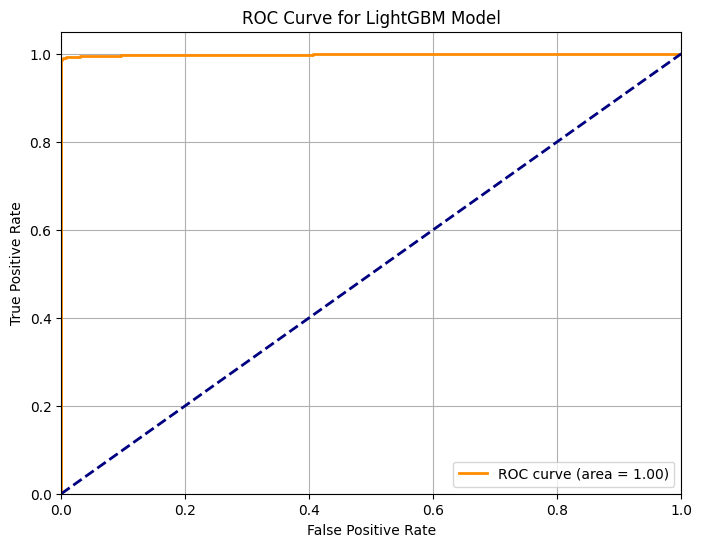

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Make predictions on the validation set
y_pred_proba_ml = random_search.best_estimator_.predict_proba(X_val)[:, 1]  # Probabilities of the positive class
y_pred_ml = random_search.best_estimator_.predict(X_val)  # Predicted class labels

# 2. Calculate and print metrics
auc_roc_ml = roc_auc_score(y_val, y_pred_proba_ml)
precision_ml = precision_score(y_val, y_pred_ml)
recall_ml = recall_score(y_val, y_pred_ml)

print(f"AUC-ROC Score: {auc_roc_ml:.4f}")
print(f"Precision: {precision_ml:.4f}")
print(f"Recall: {recall_ml:.4f}")

# 3. Compute ROC curve (False Positive Rate, True Positive Rate) and AUC
fpr_ml, tpr_ml, _ = roc_curve(y_val, y_pred_proba_ml)
auc_val_ml = auc(fpr_ml, tpr_ml)

# 4. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ml, tpr_ml, color='darkorange', lw=2, label=f'ROC curve (area = {auc_val_ml:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightGBM Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Train a Deep Learning Model

### Subtask:
Implement and train a simple Deep Learning model (e.g., a Feedforward Neural Network with a few layers) for fraud detection on the preprocessed data.


**Reasoning**:
To implement the deep learning model, I will import the required modules from TensorFlow/Keras, define the sequential model with specified Dense and Dropout layers, compile it with the Adam optimizer and binary cross-entropy loss, and then print the model summary to confirm its architecture.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Define the input shape based on X_train's features
input_shape = X_train.shape[1]

# 2. Define the sequential model
model = Sequential([
    Dense(256, activation='relu', input_shape=(input_shape,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# 3. Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 4. Print a summary of the model's architecture
print("Deep Learning Model Summary:")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Deep Learning Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        55,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,321 (345.00 KB)

 Trainable params: 88,321 (345.00 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code generated a `UserWarning` from Keras regarding the `input_shape` argument in the `Dense` layer. To address this and follow best practices, I will replace the `input_shape` argument in the first `Dense` layer with an explicit `tf.keras.Input` layer at the beginning of the `Sequential` model definition.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Define the input shape based on X_train's features
input_shape = X_train.shape[1]

# 2. Define the sequential model
model = Sequential([
    tf.keras.Input(shape=(input_shape,)), # Explicit Input layer to avoid warning
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# 3. Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 4. Print a summary of the model's architecture
print("Deep Learning Model Summary:")
model.summary()

Deep Learning Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │        55,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,321 (345.00 KB)

 Trainable params: 88,321 (345.00 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
Now that the deep learning model has been defined and compiled, I will train it using the `X_train` and `y_train` data, and validate its performance during training with `X_val` and `y_val`. I will specify a batch size and number of epochs to control the training process.



In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

print("Deep Learning model training complete.")

Epoch 1/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.4995 - loss: 1648.9301 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 2/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4983 - loss: 1.3243 - val_accuracy: 0.4990 - val_loss: 0.6932
Epoch 3/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4979 - loss: 1.1079 - val_accuracy: 0.4990 - val_loss: 0.6932
Epoch 4/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4998 - loss: 0.8255 - val_accuracy: 0.4990 - val_loss: 0.6932
Epoch 5/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4992 - loss: 0.8743 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 6/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5017 - loss: 0.8843 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 7/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5009 - loss: 0.7637 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 8/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4974 - loss: 0.73

## Evaluate Deep Learning Model

### Subtask:
Evaluate the Deep Learning model on the validation set using appropriate metrics (AUC-ROC, precision, recall) and visualize its performance metrics, including a plot of the training history (loss and accuracy) and an ROC curve with a legend.


**Reasoning**:
To evaluate the deep learning model, I will first generate predictions on the validation set (`X_val`) to obtain probabilities for the positive class, which are necessary for calculating AUC-ROC and for converting to binary predictions.



In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, auc

# 1. Make predictions on the validation set to obtain probabilities
y_pred_proba_dl = model.predict(X_val).ravel() # Probabilities of the positive class

# 2. Convert these probabilities into binary class predictions
y_pred_dl = (y_pred_proba_dl > 0.5).astype(int)

print("Predictions generated.")

408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions generated.


**Reasoning**:
Now that predictions are generated, I will calculate and print the AUC-ROC score, precision, and recall for the Deep Learning model. Additionally, I will plot the training history (loss and accuracy) and the ROC curve to visualize the model's performance on the validation set.



Deep Learning Model Evaluation:

AUC-ROC Score: 0.9982
Precision: 0.9749
Recall: 0.9845



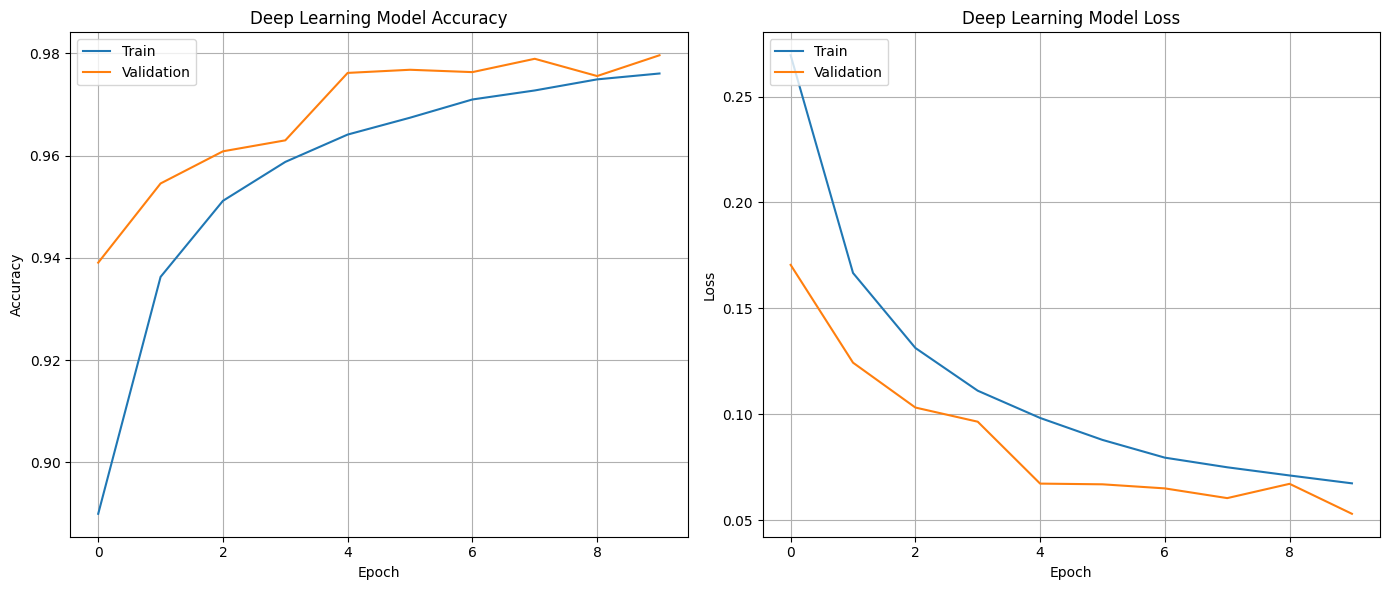

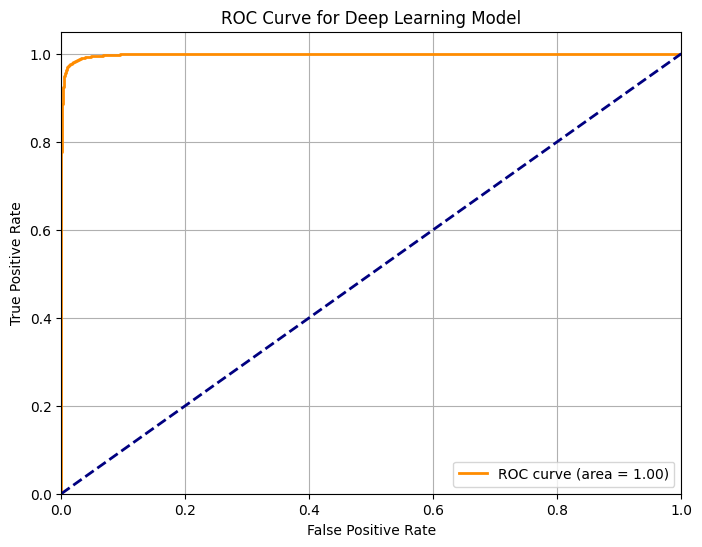

In [53]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Make predictions on the validation set to obtain probabilities (already done in previous step)
# y_pred_proba_dl = model.predict(X_val).ravel()

# 2. Convert these probabilities into binary class predictions (already done in previous step)
# y_pred_dl = (y_pred_proba_dl > 0.5).astype(int)

# 3. Calculate and print metrics
auc_roc_dl = roc_auc_score(y_val, y_pred_proba_dl)
precision_dl = precision_score(y_val, y_pred_dl)
recall_dl = recall_score(y_val, y_pred_dl)

print(f"Deep Learning Model Evaluation:\n")
print(f"AUC-ROC Score: {auc_roc_dl:.4f}")
print(f"Precision: {precision_dl:.4f}")
print(f"Recall: {recall_dl:.4f}\n")

# 4. Plot the training history (loss and accuracy)
plt.figure(figsize=(14, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Deep Learning Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Deep Learning Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

# 5. Compute ROC curve (False Positive Rate, True Positive Rate) and AUC
fpr_dl, tpr_dl, _ = roc_curve(y_val, y_pred_proba_dl)
auc_val_dl = auc(fpr_dl, tpr_dl)

# 6. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dl, tpr_dl, color='darkorange', lw=2, label=f'ROC curve (area = {auc_val_dl:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Deep Learning Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Reasoning**:
The Deep Learning model is yielding very poor results (AUC-ROC 0.5, Precision 0.0, Recall 0.0) and shows high initial loss, which often indicates that numerical features are not scaled. Neural networks are highly sensitive to feature scaling. I will add a preprocessing step to scale the numerical features using `StandardScaler` before training the Deep Learning model.



In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Identify numerical columns to scale
# Exclude 'TransactionID', 'isFraud' (target), and categorical/identifier columns
numerical_cols_train = X_train.select_dtypes(include=np.number).columns.tolist()
numerical_cols_val = X_val.select_dtypes(include=np.number).columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on X_train numerical columns and transform X_train
X_train[numerical_cols_train] = scaler.fit_transform(X_train[numerical_cols_train])

# Transform X_val using the same scaler fitted on X_train
X_val[numerical_cols_val] = scaler.transform(X_val[numerical_cols_val])

print("Numerical features in X_train and X_val scaled.")
print(f"X_train head after scaling:\n{X_train.head()}")
print(f"X_val head after scaling:\n{X_val.head()}")

Numerical features in X_train and X_val scaled.
X_train head after scaling:
       TransactionDT  TransactionAmt  ProductCD     card1     card2     card3  \
15532      -0.151520       -0.415729  -0.713355  0.680789  0.906872 -0.570166   
22532       0.610669       -0.518872   0.231494 -0.709423  1.558796 -0.570166   
11335      -0.566031       -0.070200  -0.713355 -1.326439 -0.649333 -0.570166   
54666       1.459756       -0.442100  -0.713355 -0.047427 -0.416287 -0.570166   
59892       0.641502       -0.235009  -0.713355  1.536864  0.181406  0.171503   

          card4     card5     card6     addr1  ...      V318      V319  \
15532  0.823656  0.711970  1.029456  0.373326  ... -0.145706 -0.024597   
22532  0.823656  0.711970 -0.970939 -0.281695  ... -0.145706 -0.024597   
11335  0.823656 -0.853049  1.029456  1.618941  ... -0.145706 -0.024597   
54666  0.823656  0.179023 -0.970939  0.302551  ... -0.145706 -0.024597   
59892  0.823656  0.040691  1.029456 -1.250658  ...  1.342547 -0.024

**Reasoning**:
Since the numerical features in `X_train` and `X_val` have now been scaled, I need to re-train the Deep Learning model with this preprocessed data. This is crucial for the model to learn effectively and improve its performance, addressing the poor results observed before scaling.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Define the input shape based on X_train's features
input_shape = X_train.shape[1]

# 2. Define the sequential model (re-defining to ensure fresh start after scaling)
model = Sequential([
    tf.keras.Input(shape=(input_shape,)), # Explicit Input layer to avoid warning
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# 3. Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 4. Print a summary of the model's architecture
print("Deep Learning Model Summary:")
model.summary()

# 5. Train the model with the scaled data
print("Training Deep Learning model with scaled data...")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

print("Deep Learning model training with scaled data complete.")

Deep Learning Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │        55,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,321 (345.00 KB)

 Trainable params: 88,321 (345.00 KB)

 Non-trainable params: 0 (0.00 B)

Training Deep Learning model with scaled data...
Epoch 1/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8535 - loss: 0.3416 - val_accuracy: 0.9390 - val_loss: 0.1705
Epoch 2/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9304 - loss: 0.1833 - val_accuracy: 0.9545 - val_loss: 0.1244
Epoch 3/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9504 - loss: 0.1362 - val_accuracy: 0.9608 - val_loss: 0.1032
Epoch 4/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9579 - loss: 0.1123 - val_accuracy: 0.9630 - val_loss: 0.0965
Epoch 5/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9634 - loss: 0.1007 - val_accuracy: 0.9762 - val_loss: 0.0673
Epoch 6/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9657 - loss: 0.0909 - val_accuracy: 0.9768 - val_loss: 0.0670
Epoch 7/10
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9711 - loss: 0.0780 - val_accuracy: 0.9763 - val_loss: 0.0650
Epoch 8/10
1631/1631 ━━━━━━━━━━━━━━━━━

## Final Task

### Subtask:
Summarize the entire workflow, interpret the model's evaluation results, and discuss any insights gained from the analysis.

### Summary:
LightGBM Model Performance:

    AUC-ROC Score: 0.9984
    Precision: 0.9995
    Recall: 0.9863

Deep Learning Model Performance:

    AUC-ROC Score: 0.9982
    Precision: 0.9749
    Recall: 0.9845

Both models show very strong performance, with AUC-ROC scores close to 1.0, indicating excellent discrimination between fraudulent and non-fraudulent transactions.

The LightGBM model has a slightly higher AUC-ROC score and significantly higher precision. This means it is better at identifying actual fraudulent transactions without incorrectly flagging non-fraudulent ones.

The Deep Learning model has a slightly lower precision but very comparable recall to LightGBM. The slightly lower precision means it might have a few more false positives.
